<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>


# LinkedIn - Extract content company world cloud
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/LinkedIn/Linkedin_Follow_number_of_content_published.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #linkedin #html #plotly #csv #image #content #analytics #automation

**Author:** [Florent Ravenel](https://www.linkedin.com/in/florent-ravenel/)

Reference:
- https://www.datacamp.com/tutorial/wordcloud-python

## Input

In [8]:
# Get common path and run it
from os import path

common_path = "../common.ipynb"
if not path.exists(common_path):
    common_path = f"{naas.secret.get('GIT_REPO_NAME')}/common.ipynb"

%run "$common_path"

### Import libraries

In [2]:
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud --user
    from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Setup Variables

In [3]:
# Inputs
KPI_TITLE = "World cloud"
INPUT_DATABASE = LK_COMPANY_POSTS
OWNER = LK_COMPANY_NAME
OWNER_ID = LK_COMPANY_ID
PLATFORM = LINKEDIN
ORDER = ORDER_MTD

# Outputs
name_output = f"LINKEDIN_EXTRACT_COMPANY_{KPI_TITLE.lower().replace(' ', '_')}_{OWNER_ID}"
image_output = path.join(LINKEDIN_OUTPUTS, f"{name_output}.png")

## Model

### Get your post

In [4]:
df_posts = get_data(INPUT_DATABASE)
print("✅ Posts fetched:", len(df_posts))
df_posts.head(1)

✅ Posts fetched: 127


,ACTIVITY_ID,PUBLISHED_DATE,AUTHOR_NAME,AUTHOR_URL,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,POLL_ID,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,DATE_EXTRACT
0,6948675435887001600,2022-07-01 16:35:24+02:00,naas.ai,https://www.linkedin.com/company/70506391,1 day ago,⚡️Want to know how to build data products from...,⚡️Want to know how to build data products from...,91,NaN,0,...,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,180,0,3,0,0.016667,2022-07-03 13:44:47


### Filter data

In [5]:
def filter_data(df,
                col_date="PUBLISHED_DATE",
                month_rolling=MONTH_ROLLING):
    # Datemin
    date_min = (datetime.now() - relativedelta(months=MONTH_ROLLING)).strftime(ORDER)
    
    # Init date
    df[col_date] = pd.to_datetime(df[col_date].str[:-6]).dt.strftime(ORDER)
    
    # Filter
    df = df[df[col_date].astype(int) >= int(date_min)]
    return df.reset_index(drop=True)

df_filter = filter_data(df_posts)
print("✅ Posts fetched:", len(df_filter))
df_filter.head(1)

✅ Posts fetched: 126


,ACTIVITY_ID,PUBLISHED_DATE,AUTHOR_NAME,AUTHOR_URL,SUBDESCRIPTION,TITLE,TEXT,CHARACTER_COUNT,TAGS,TAGS_COUNT,...,POLL_ID,POLL_QUESTION,POLL_RESULTS,POST_URL,VIEWS,COMMENTS,LIKES,SHARES,ENGAGEMENT_SCORE,DATE_EXTRACT
0,6948675435887001600,202207,naas.ai,https://www.linkedin.com/company/70506391,1 day ago,⚡️Want to know how to build data products from...,⚡️Want to know how to build data products from...,91,NaN,0,...,NaN,NaN,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,180,0,3,0,0.016667,2022-07-03 13:44:47


### Create world cloud

In [6]:
#Creating the text variable
text = " ".join(text for text in df_filter.astype(str).TEXT)

In [7]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False,
                       background_color='white',
                       width=1200,
                       height=600).generate(text)
word_cloud

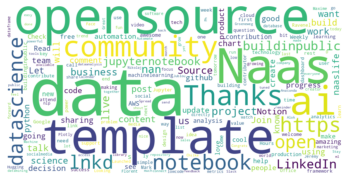

In [8]:
%matplotlib inline

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

## Output

### Save and share your graph in image

In [9]:
# Save your image in PNG
output_path = save_graph_asset(word_cloud, image_output, image=True)

# Share output with naas
image_link = naas.asset.add(output_path)

#-> Uncomment the line below to remove your asset
# naas.asset.delete(image_output)

👌 Well done! Your Assets has been sent to production.



<IPython.core.display.Javascript object>

Button(button_style='primary', description='Copy URL', style=ButtonStyle())

Output()

PS: to remove the "Assets" feature, just replace .add by .delete


### Update Notion Report

In [10]:
update_report_status(KPI_TITLE,
                     PLATFORM,
                     OWNER,
                     image_link=image_link)

✅ Page 'World cloud - LinkedIn - naas.ai' updated in Notion.
